In [61]:
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
import os
import re

In [62]:
#definindo os diretórios

main_dir = '/home/jerre/git/Stable_Diffusion_IC/colab_images'
pleasant_p1dir = '/home/jerre/git/Stable_Diffusion_IC/colab_images/Pleasant+1'
pleasant_p2dir = '/home/jerre/git/Stable_Diffusion_IC/colab_images/Pleasant+2'
pleasant_p3dir = '/home/jerre/git/Stable_Diffusion_IC/colab_images/Pleasant+3'
pleasant_p4dir = '/home/jerre/git/Stable_Diffusion_IC/colab_images/Pleasant+4'
pleasant_p5dir = '/home/jerre/git/Stable_Diffusion_IC/colab_images/Pleasant+5'
pleasant_n1dir = '/home/jerre/git/Stable_Diffusion_IC/colab_images/Pleasant-1'
pleasant_n2dir = '/home/jerre/git/Stable_Diffusion_IC/colab_images/Pleasant-2'
pleasant_n3dir = '/home/jerre/git/Stable_Diffusion_IC/colab_images/Pleasant-3'
pleasant_n4dir = '/home/jerre/git/Stable_Diffusion_IC/colab_images/Pleasant-4'
pleasant_n5dir = '/home/jerre/git/Stable_Diffusion_IC/colab_images/Pleasant-5'

In [63]:
def complexity_ratio(img_path, compressed_img_path):
    
    image = Image.open(img_path)
    
    image.save(compressed_img_path, optimize=True, quality=95)
    
    compressed_size = os.path.getsize(compressed_img_path)

    return (round((compressed_size/(512*512*3))*100, 2))

In [64]:
images_path = []
images_weight = []
images_comp_ratio = []

def import_images(directory):
    
    compressed_dir = os.path.join(main_dir, 'compressed')
    if not os.path.exists(compressed_dir):
        os.makedirs(compressed_dir)
    
    for root, dirs, files in os.walk(directory):
        for file in files:
            if file.lower().endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp')):
                img_path = os.path.join(root, file)

                #encaminhar para nova pasta de arquivos comprimidos
                compressed_img_path = os.path.join(compressed_dir, f"compressed_{file}")
                
                comp_ratio = complexity_ratio(img_path, compressed_img_path)
                images_comp_ratio.append(comp_ratio)
                
                images_path.append(img_path)

                match_p = re.search(r'Pleasant\+(\d+)', directory)
                match_n = re.search(r'Pleasant-(\d+)', directory)

                if match_p:
                    images_weight.append(int(match_p.group(1)))
                elif match_n:
                    images_weight.append(int(match_n.group(1)) * -1)
                else:
                    images_weight.append('0')

import_images(pleasant_p1dir)
import_images(pleasant_p2dir)
import_images(pleasant_p3dir)
import_images(pleasant_p4dir)
import_images(pleasant_p5dir)
import_images(pleasant_n1dir)
import_images(pleasant_n2dir)
import_images(pleasant_n3dir)
import_images(pleasant_n4dir)
import_images(pleasant_n5dir)

# Create the DataFrame and sort it
df = pd.DataFrame({'path': images_path, 'weight': images_weight, 'complexity': images_comp_ratio})
df = df.sort_values(by=['weight'])
df.reset_index(drop=True, inplace=True)
print(df.head(12))

df = pd.DataFrame({'path': images_path, 'weight': images_weight, 'complexity': images_comp_ratio})
df = df.sort_values(by=['weight'])
df.reset_index(drop=True, inplace=True)
df.to_csv('out.csv', index=False)

                                                 path  weight  complexity
0   /home/jerre/git/Stable_Diffusion_IC/colab_imag...      -5       62.96
1   /home/jerre/git/Stable_Diffusion_IC/colab_imag...      -5       56.51
2   /home/jerre/git/Stable_Diffusion_IC/colab_imag...      -5       63.58
3   /home/jerre/git/Stable_Diffusion_IC/colab_imag...      -5       56.84
4   /home/jerre/git/Stable_Diffusion_IC/colab_imag...      -5       46.07
5   /home/jerre/git/Stable_Diffusion_IC/colab_imag...      -4       54.28
6   /home/jerre/git/Stable_Diffusion_IC/colab_imag...      -4       62.96
7   /home/jerre/git/Stable_Diffusion_IC/colab_imag...      -4       46.06
8   /home/jerre/git/Stable_Diffusion_IC/colab_imag...      -4       56.44
9   /home/jerre/git/Stable_Diffusion_IC/colab_imag...      -4       62.05
10  /home/jerre/git/Stable_Diffusion_IC/colab_imag...      -3       62.10
11  /home/jerre/git/Stable_Diffusion_IC/colab_imag...      -3       61.08


<Figure size 1000x600 with 0 Axes>

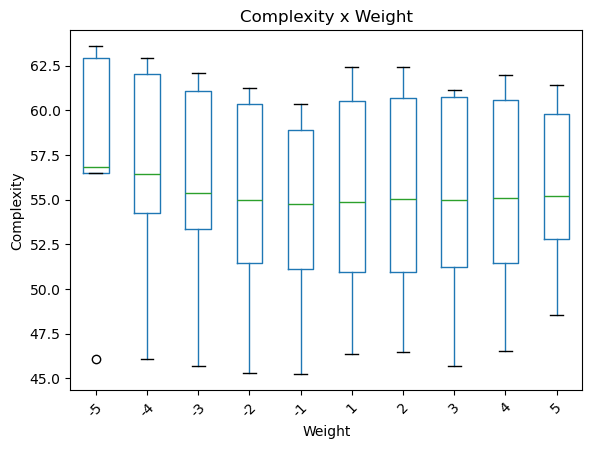

In [65]:
plt.figure(figsize=(10, 6))
df.boxplot(column='complexity', by='weight', grid=False, vert=True)
plt.title('Complexity x Weight')
plt.suptitle('')
plt.xlabel('Weight')
plt.ylabel('Complexity')
plt.xticks(rotation=45)
plt.show()